# Programming assignment 1
# Author: Khodosevich Leonid
- requirements file and data can be found in the repository
- I used Python 3.11.5
- I reran the whole code with virtualenv, it worked well. Hope, works for you too.

# Task 1: Least Squares Linear Regression

## Subtask 1: Data Preparation
(2 points)
Load the “California Housing” data set using the function sklearn.datasets.fetch_california_housing.   
Split the data into a training set con- sisting of 70% of the samples and a test set of 30% of the samples.   
You can use the function sklearn.model_selection.train_test_split. Use this split of the data for the remainder of this exercise.  
- Report the number of features of the data set, and the number of samples in the training data and in the test data.  

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

SEED = 42

In [2]:
# loading data and splitting
data = fetch_california_housing(as_frame=True)
X, y = data.data.values, data.target.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=SEED, shuffle=True
)

In [3]:
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of samples train: {X_train.shape[0]}, test: {X_test.shape[0]}")

Number of features: 8
Number of samples train: 14448, test: 6192


## Subtask 2: Regression Using scikit-learn
(2 points)
Train a least squares linear regression model (without bias)   
to fit the training using scikit-learn"s LinearRegression class:   
sklearn.linear_model.LinearRegression.  
  
- Report the MSE (sklearn.metrics.mean_squared_error) of this model on the training and the test set.  

In [4]:
linreg_skl = LinearRegression(fit_intercept=False)
linreg_skl.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [5]:
print(f"Regression coeficients: {linreg_skl.coef_}\n")
print(f"TRAIN MSE: {mean_squared_error(y_train, linreg_skl.predict(X_train))}")
print(f"TEST MSE: {mean_squared_error(y_test, linreg_skl.predict(X_test))}")

Regression coeficients: [ 5.19126645e-01  1.59077753e-02 -1.91238789e-01  9.69525468e-01
  1.14227799e-05 -4.22684919e-03 -6.17086173e-02 -1.48558358e-02]

TRAIN MSE: 0.6054030599879396
TEST MSE: 0.6048785796543389


## Subtask 3: Implement Linear Regression on Your Own I
(6 points)
Repeat the previous task but this time do not use scikit-learn"s LinearRegression class for fitting   
the training data and making predictions but rather implement the closed form solution for  
least squares linear regression as discussed in the lecture yourself and use the   
resulting weight vector for making predictions.  
- Report the computed weight vector.
- Again, compute the MSE on the training and test set for the obtained regressor and report these results.
- Do the results match your results from the previous subtask?

In [6]:
class ClosedFormLinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        self.w = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y

    def predict(self, X_test):
        return X_test @ self.w
    
    @property
    def coef_(self):
        return self.w

In [7]:
linreg = ClosedFormLinearRegression()
linreg.fit(X_train, y_train)

In [8]:
print(f"Regression coeficients: {linreg.coef_}\n")
print(f"TRAIN MSE: {mean_squared_error(y_train, linreg.predict(X_train))}")
print(f"TEST MSE: {mean_squared_error(y_test, linreg.predict(X_test))}")

Regression coeficients: [ 5.19126645e-01  1.59077753e-02 -1.91238789e-01  9.69525468e-01
  1.14227799e-05 -4.22684919e-03 -6.17086173e-02 -1.48558358e-02]

TRAIN MSE: 0.6054030599879396
TEST MSE: 0.604878579654339


In [9]:
print(f"Difference between regressors coefficients: \n{linreg.coef_ - linreg_skl.coef_}")

Difference between regressors coefficients: 
[ 2.87547763e-14  9.63812363e-15  7.11097847e-14 -3.49942297e-13
  1.13822593e-16 -9.48893741e-16  2.00825467e-13  6.50902943e-14]


- The difference between two regressors is negligibly small

## Subtask 4: Implement Least Squares Linear Regression on Your Own II
(10 points)
Repeat the previous task but this time do not implement the closed form solution for   
least squares linear regression but implement gradient descent, i.e.,   
implement the gradient of the loss function and the parameter update.   
Start your training from an all-zero weight vector. Use a learning rate schedule of your  
 choice with decreasing learning rate. Make sure to pick the schedule such that the   
 objective improves over the iterations.  
- Generate plots showing the MSE on the training and test set (on the y-axis) after 1 + 1000k gradient steps, where k ∈ {0, . . . , 100} (x-axis).
- Describe what you observe in the plots.
- How do the final MSEs compare to that of the closed-form solution?


In [10]:
class GDLinearRegression:
    def __init__(
            self,
            num_iter=1000, 
            learning_rate=0.01, 
            lr_scheduler_iteration=100, 
            X_test=None, 
            y_test=None
            ):
        self.learning_rate = learning_rate*10
        self.num_iter = num_iter
        self.w = None
        self.lr_scheduler_iteration = lr_scheduler_iteration
        self.X_test = X_test
        self.y_test = y_test
        self.train_loss = []
        self.test_loss = []

    def fit(self, X_train, y_train):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        for iteration in tqdm(range(self.num_iter)):
            self._update_learning_rate(iteration)

            self._update_error(iteration, X_train, y_train)
        
            gradient = self._get_gradient(X_train, y_train)
            self.w = self.w - self.learning_rate * gradient
            
            # print(self.w)

    def predict(self, X):
        return X @ self.w
    
    def plot_loss(self):
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))
        plt.plot(list(range(1, 101)), np.log(self.train_loss[1:]), label='train mse')
        plt.plot(list(range(1, 101)), np.log(self.test_loss[1:]), label='test mse')
        plt.xlabel('iteration')
        plt.ylabel('log(mse)')
        plt.title('GD Linear Regression')
        for i in range(10, 100, 10):
            plt.axvline(
                x=i, color='red', linestyle='--', alpha=0.5
                )
        plt.axvline(
                x=100, color='red', linestyle='--', alpha=0.5, label="lr scheduler"
                )
        plt.grid()
        plt.legend()
        plt.show()

    def _update_error(self, iteration, X_train, y_train):
        if iteration % 1000 == 0:
            self.train_loss.append(mean_squared_error(self.predict(X_train), y_train))
            self.test_loss.append(mean_squared_error(self.predict(self.X_test), self.y_test))
        
    def _update_learning_rate(self, iteration):
        if iteration % self.lr_scheduler_iteration == 0:
            self.learning_rate *= 0.1

    def _get_gradient(self, X, y):
        return 2 / len(X) * X.T @ (self.predict(X) - y)
    
    @property
    def coef_(self):
        return self.w

In [11]:
num_iter = 1000*100 + 1
learning_rate = 1.0e-7
lr_scheduler_iteration=10000
gd_lin_reg = GDLinearRegression(num_iter, learning_rate, lr_scheduler_iteration, X_test, y_test)
gd_lin_reg.fit(X_train, y_train)

100%|██████████| 100001/100001 [00:14<00:00, 7091.74it/s]


In [12]:
print(
    f"TRAIN MSE of GD linear regression: {mean_squared_error(y_train, gd_lin_reg.predict(X_train))}"
)
print(f"TEST MSE of GD linear regression: {mean_squared_error(y_test, gd_lin_reg.predict(X_test))}")

TRAIN MSE of GD linear regression: 1.3143993366738707
TEST MSE of GD linear regression: 1.2893119606479806


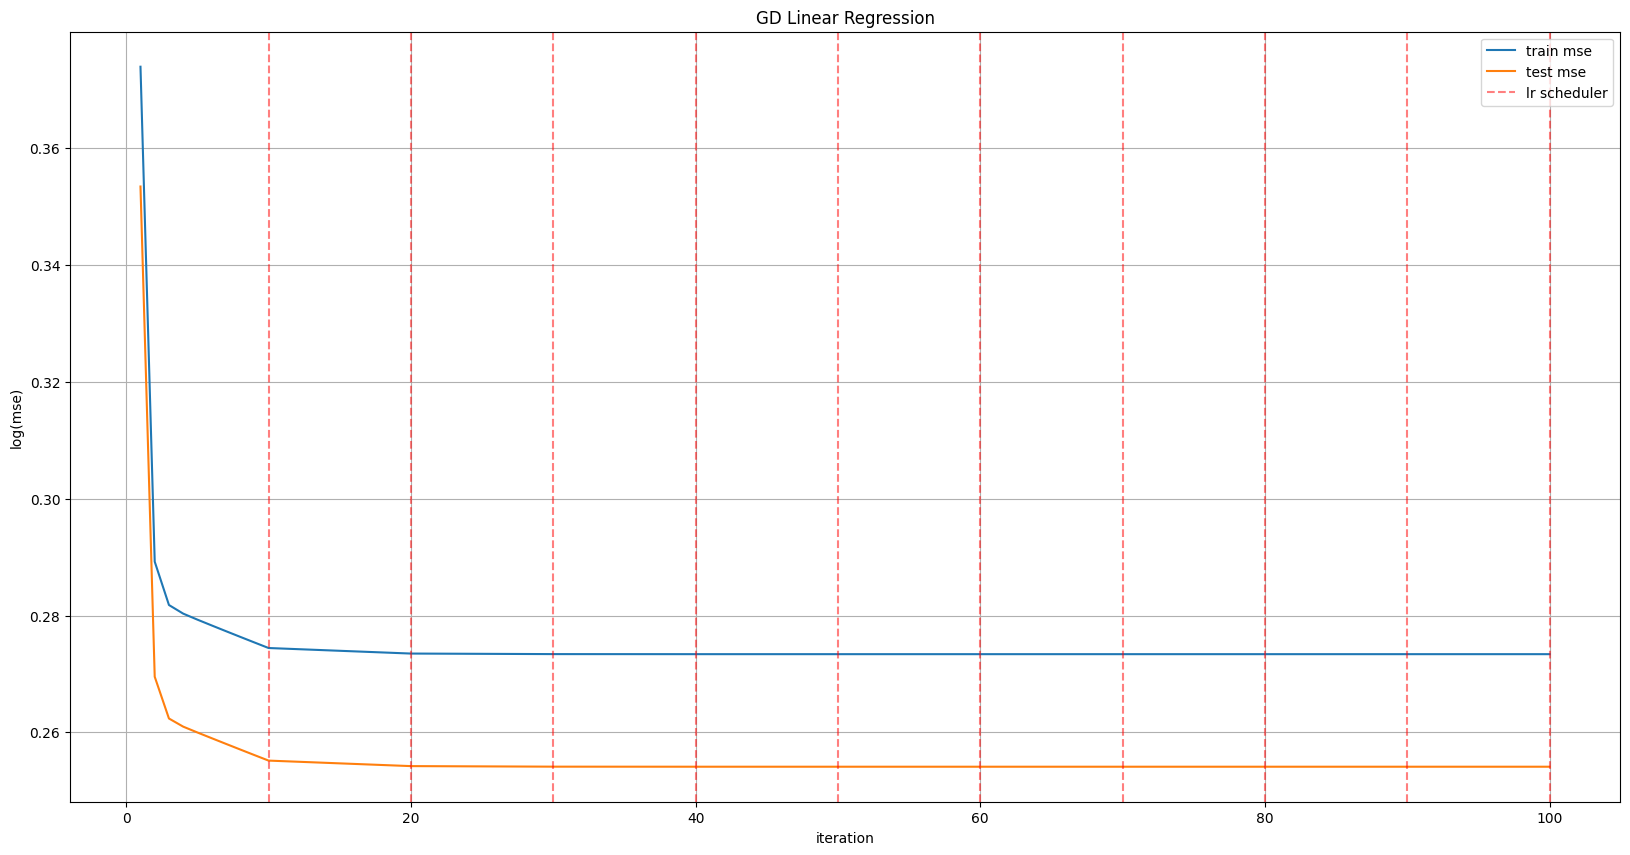

In [13]:
gd_lin_reg.plot_loss()

Observations:
1) LR scheduler works, as when it update lr, mse decreases
2) Closed form has lower mse than gd, which means, that gd couldnt find optimum
3) If we use bigger lr, gradient will explode, causing float overflow

# Task 2: Non-linear Regression and Classification

## Subtask 1: Toy Data Regression
(10 points)
Download the “Toy Regression” dataset from [1].   
Construct non-linear features of the data such that a least squares linear regression model   
fitted on the training data achieves an MSE below 0.01 on the test data.   
Feel free to use scikit-learn"s linear_model.LinearRegression for performing the linear regression.   
The features you construct must not be polynomial features.   
- Describe your approach.  
- What is the best performance you achieve using polynomial features? For which  
degree of polynomial do you observe this best performance?  
Hint: visualize the data to get insights into useful non-linear features.  


### EDA and finding best functions

In [14]:
hf = h5py.File("toy-regression.h5", "r")
x_train = np.array(hf.get("x_train"))
y_train = np.array(hf.get("y_train"))
x_test = np.array(hf.get("x_test"))
y_test = np.array(hf.get("y_test"))
hf.close()

In [15]:
df = pd.DataFrame(np.concat([x_train, y_train.reshape(-1,1)], axis=1), columns=["x1", "x2", "y"])
df.loc[:, "x1x2"] = df["x1"] * df["x2"]
df.loc[:, "xpow2"] = df["x1"]**2

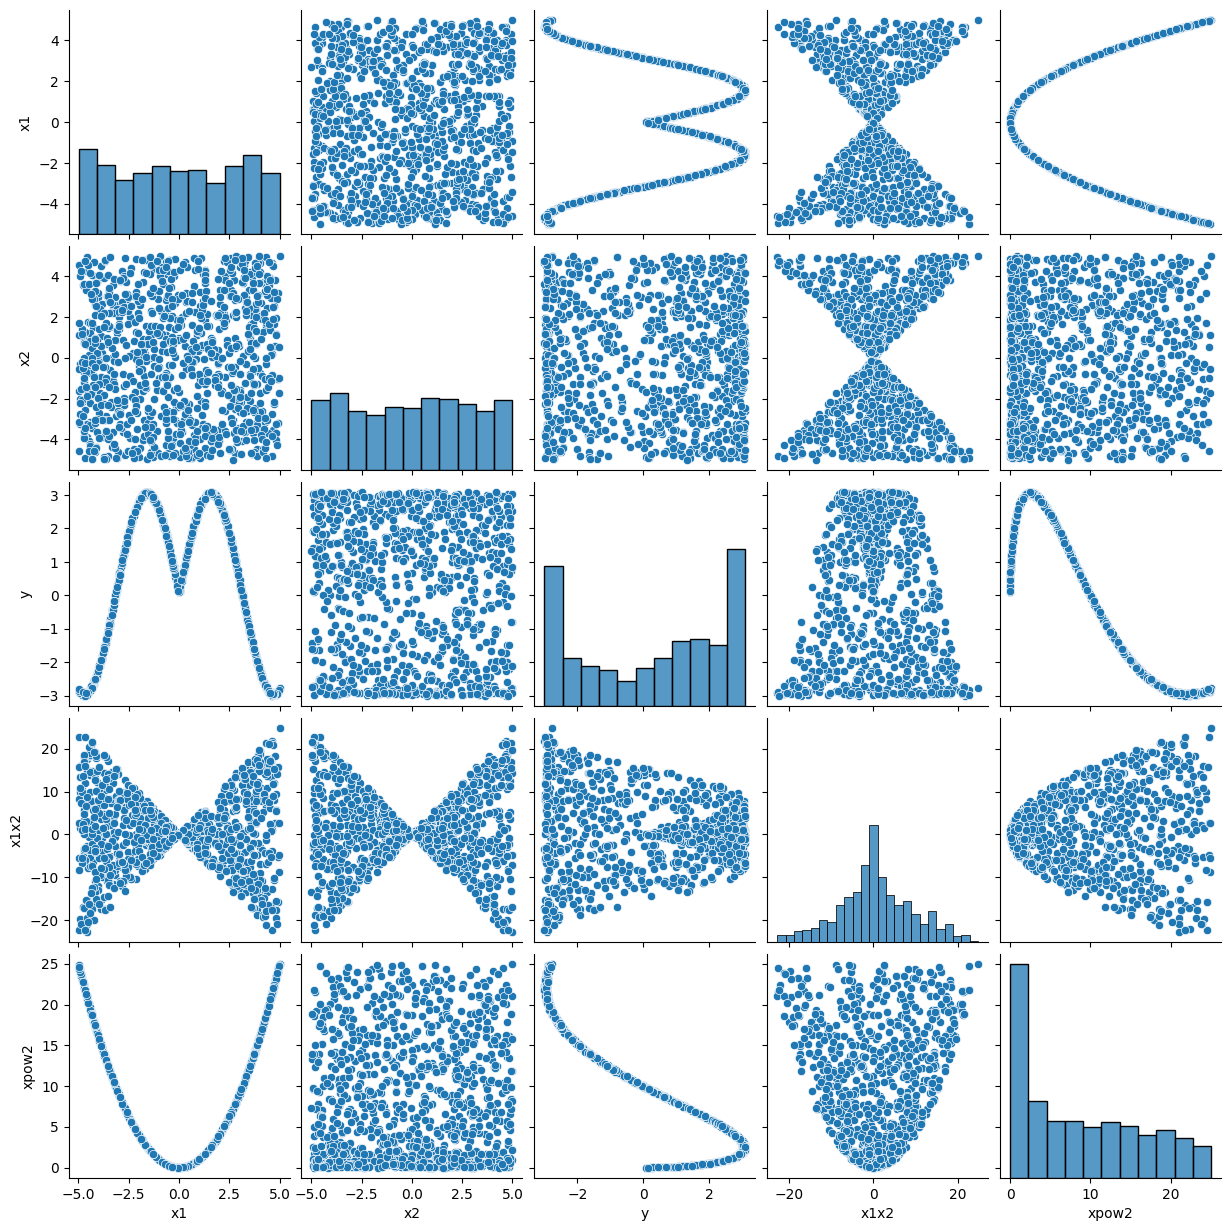

In [16]:
sns.pairplot(df)

Comments over this plot
- We probably dont need x2, data will be goodly separated by polynoms of x1
- The polynomial degree is probably 2
- X1*X2 is the same as X1ˆ2 -> we dont need it
- accually dependence of y looks like two summed normal distributions

In [17]:
pol_degree = 3
for i in range(3, pol_degree+1):
    df.loc[:, f"x1pow{i}"] = df["x1"]**i
    # df.loc[:, f"1divx1pow{i}"] = 1 / df["x1"]**i

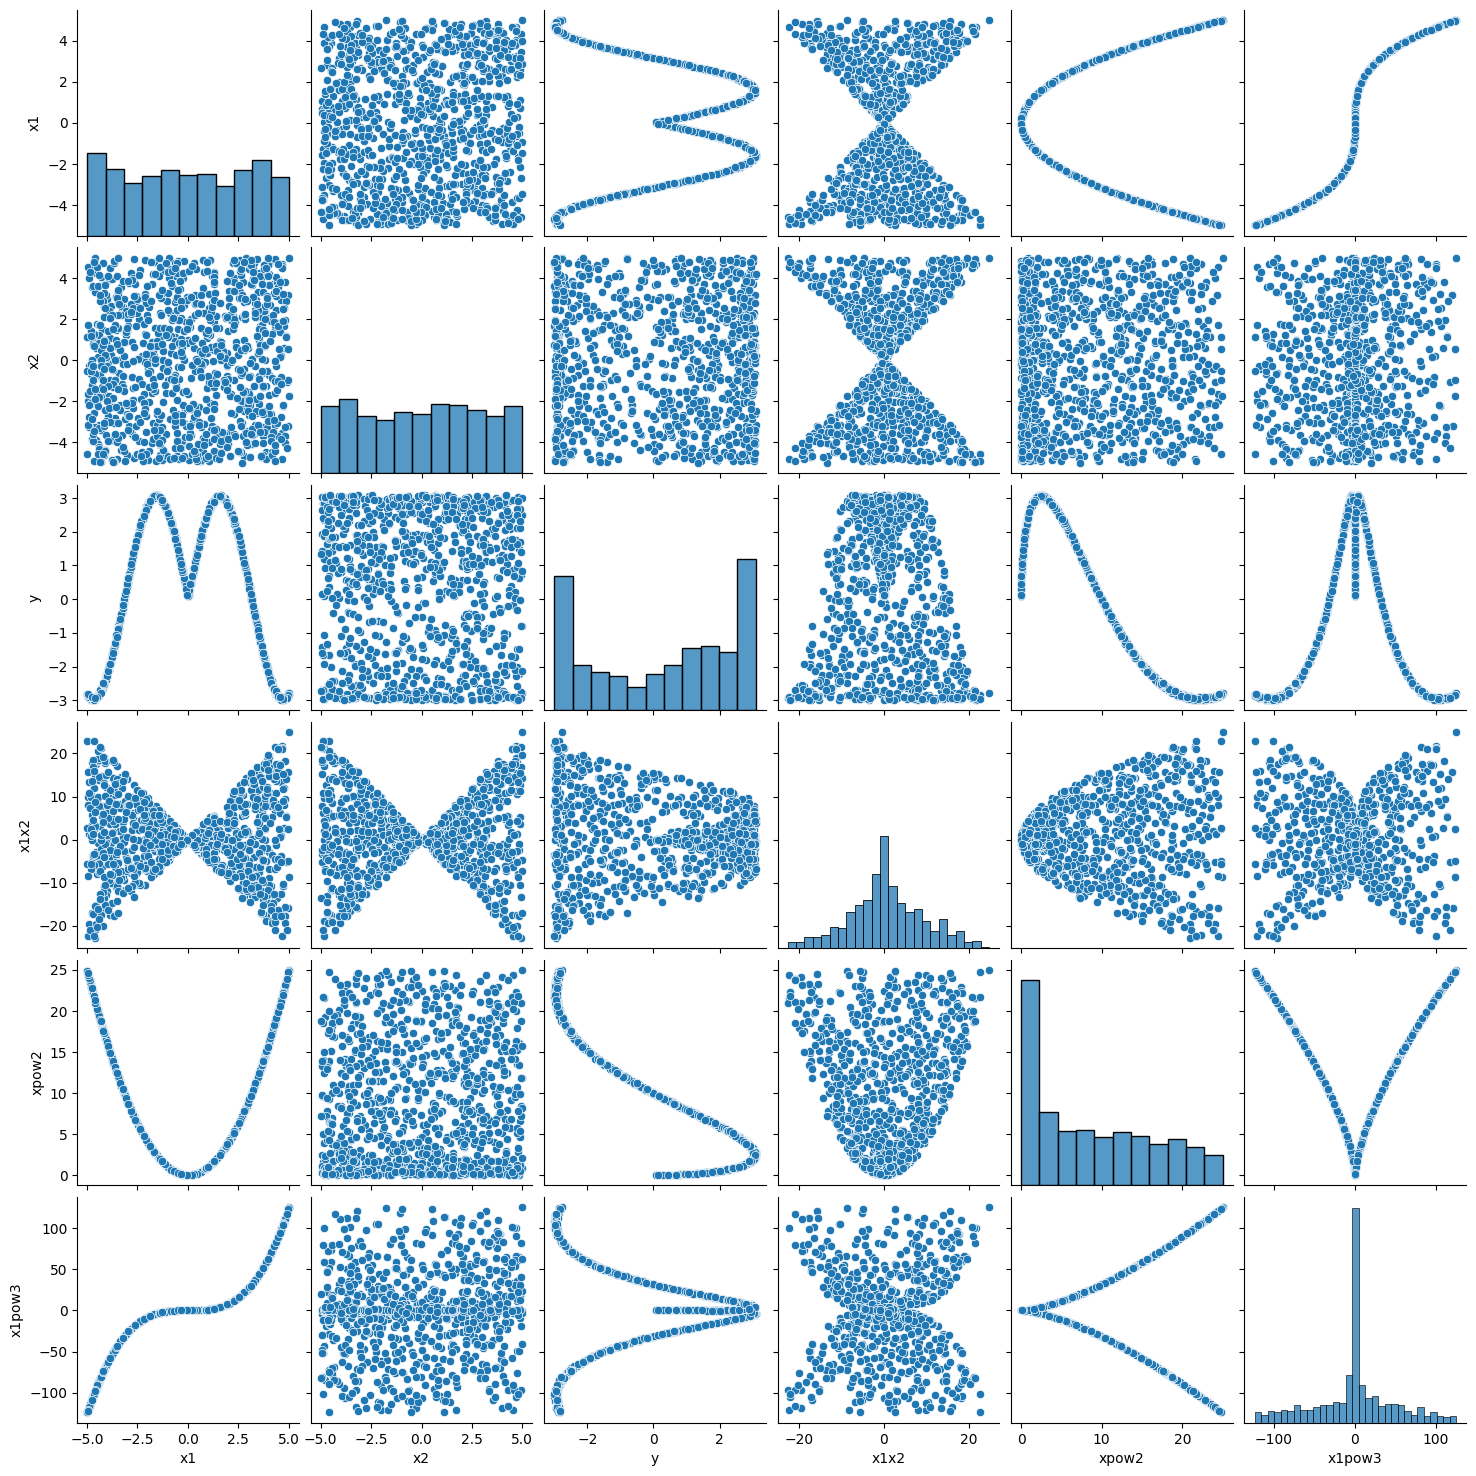

In [18]:
sns.pairplot(df)

In [19]:
# BAD TRY
# # box-muller transformation
# u1 = ((df["x1"] / df["x1"].max() + 1)/2)
# u2 = ((df["x2"] / df["x2"].max() + 1)/2)
# z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2) + 3
# z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
# df["z1"] = z1
# df["z2"] = z2

In [20]:
# BAD TRY
# df["cosx1"] = np.cos(df["x1"])
# df["sincosx1"] = np.sin(df["x1"]) + np.cos(df["x1"])

In [21]:
df["sinx1"] = np.sin(df["x1"])
#/ max(df["x1"])) # put x1 in scale -1, 1, then sin(x1)
df["sinx1divmax"] = np.sin(df["x1"] / max(df["x1"]))
df["abssinx1divmax"] = np.abs(np.sin(df["x1"]/ max(df["x1"]))) # then abs for simmetry 

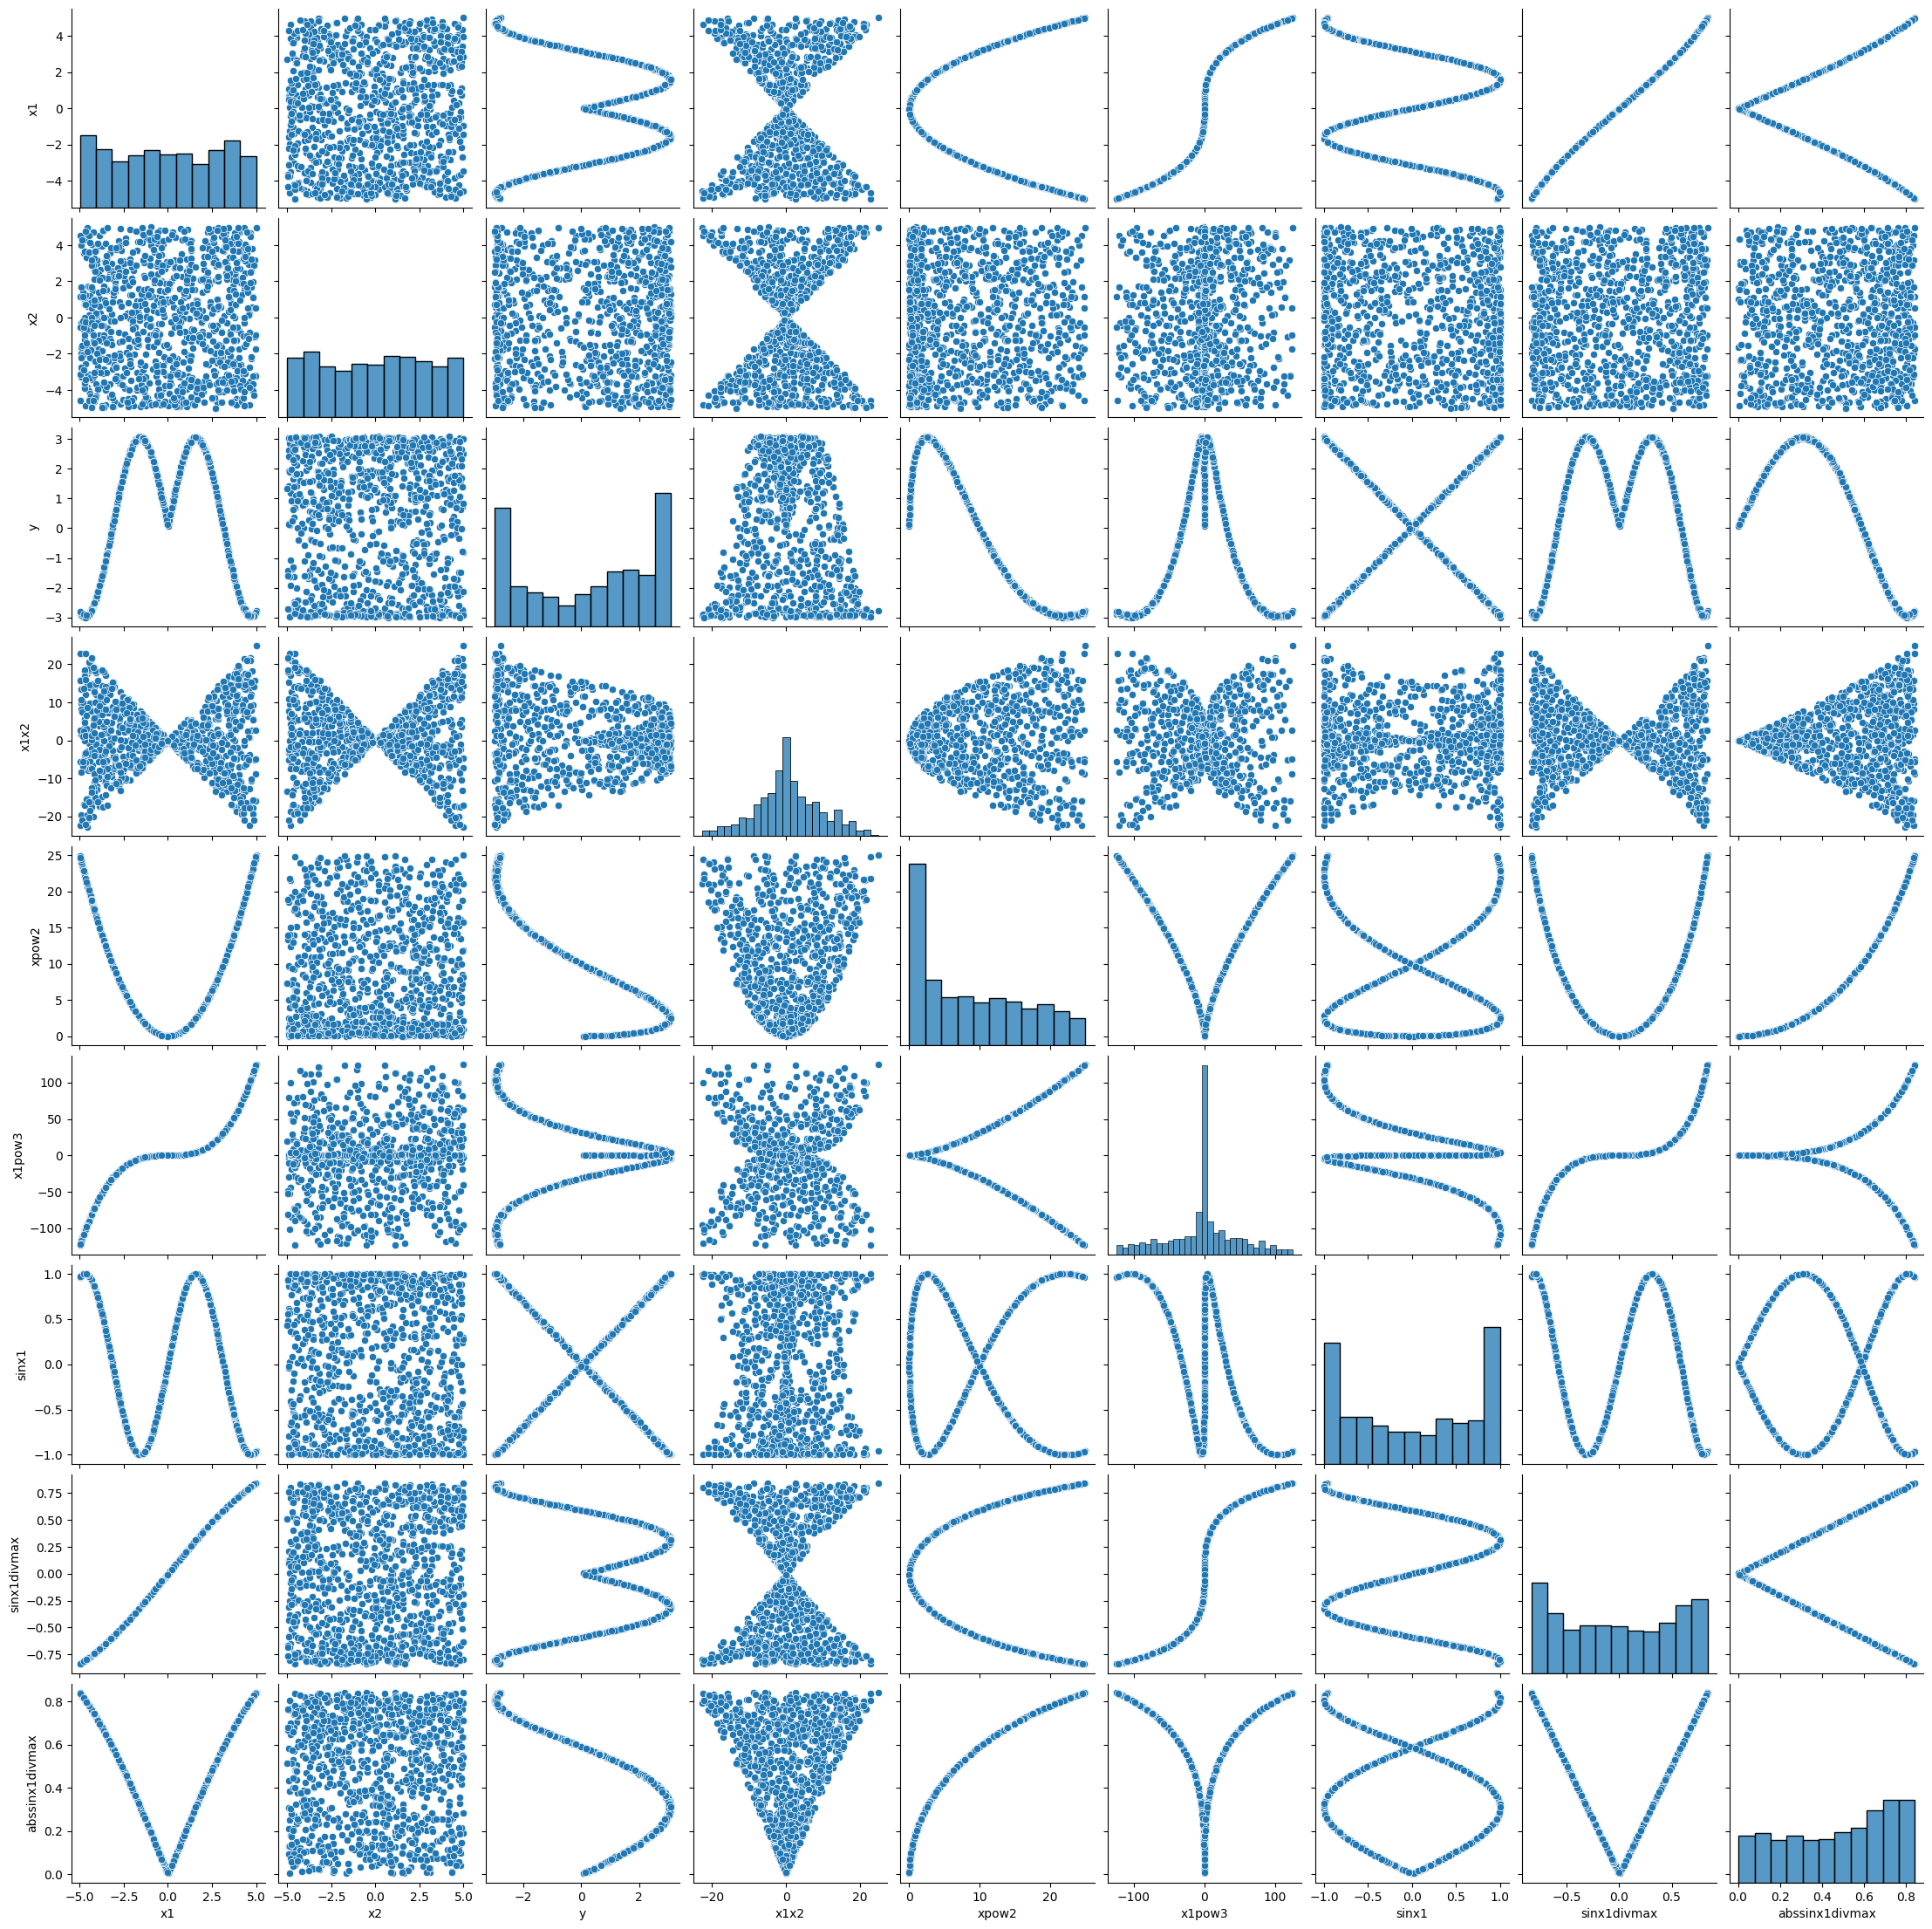

In [22]:
sns.pairplot(df)

- Now abs(sin(x / max(x))) is an OK for polynomials

### BUILDING MODEL

In [23]:
def transform_data(x, poly_degree=4):
    data = pd.DataFrame(x).copy()
    data.columns = ['x1', 'x2']
    data["abssinx1divmax"] = np.abs(np.sin(data["x1"] / max(data["x1"])))
    for i in range(2, poly_degree+1):
        data[f"x1pow{i}"] = data.abssinx1divmax**i
    return data

In [24]:
# Default result
linreg_skl = LinearRegression()
linreg_skl.fit(x_train, y_train)
print("TRAIN MSE: ", mean_squared_error(y_train, linreg_skl.predict(x_train)))
y_pred = linreg_skl.predict(x_test)
print("TEST_MSE: ", mean_squared_error(y_test, y_pred))

TRAIN MSE:  4.617518468148333
TEST_MSE:  4.737848069095474


In [25]:
poly_degree = 4
linreg_skl = LinearRegression()
linreg_skl.fit(transform_data(x_train, poly_degree), y_train)
print(
    "TRAIN MSE: ", 
    mean_squared_error(y_train, linreg_skl.predict(transform_data(x_train, poly_degree)))
)
y_pred = linreg_skl.predict(transform_data(x_test, poly_degree))
print("MSE: ", mean_squared_error(y_test, y_pred))

TRAIN MSE:  0.0014046181225216786
MSE:  0.0013761655764967914


- Only after doing this I realised, that I could use sin(abs(x)), but the goal is achieved, so I'll leave it as it is.

### Testing performance of polynomials

In [26]:
test_mse = []
degrees  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for p in degrees:
    print(f"Degree: {p}")
    poly_transform = PolynomialFeatures(degree=p)
    X_train_poly = poly_transform.fit_transform(x_train)
    X_test_poly = poly_transform.fit_transform(x_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    test_mse.append(mean_squared_error(y_test, model.predict(X_test_poly)))
    print(f"MSE Test: {test_mse[-1]}\n")
print(f"Best degree: {degrees[np.argmin(test_mse)]}")

Degree: 1
MSE Test: 4.737848069095474

Degree: 2
MSE Test: 0.7927292565271222

Degree: 3
MSE Test: 0.7936815273801596

Degree: 4
MSE Test: 0.7740311687584648

Degree: 5
MSE Test: 0.7767452572402129

Degree: 6
MSE Test: 0.2574435805354596

Degree: 7
MSE Test: 0.25953634765642164

Degree: 8
MSE Test: 0.09138111716875509

Degree: 9
MSE Test: 0.09244779054137672

Degree: 10
MSE Test: 0.04511066883004425

Best degree: 10


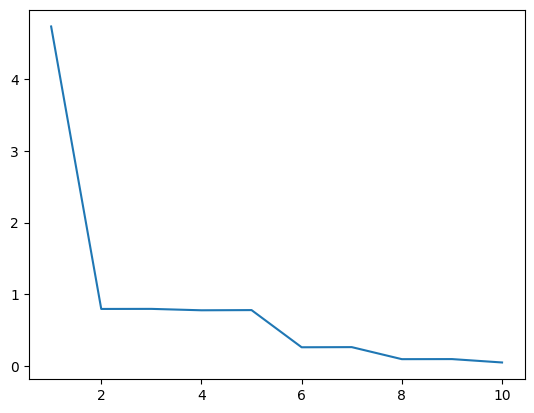

In [27]:
plt.plot(degrees, test_mse)

In [28]:
print("Conclusion:")
print(f"{degrees[np.argmin(test_mse)]}th polynomial" +\
    f"is tthe best with mse of {test_mse[np.argmin(test_mse)]} on test set")

Conclusion:
10th polynomialis tthe best with mse of 0.04511066883004425 on test set


## Subtask 2: Toy Data Classification
(10 points)
Download the “Toy Classification” dataset from [1].   
Once stored in a local folder, you can load the data similarly as described above.   
Construct non-linear features such that a linear SVM (sklearn.svm.LinearSCV)   
fitted on the training data achieves 95% accuracy on the test data.   
The features you construct must not be polynomial features.  
- Describe your approach.
- Compute and report the confusion matrix (sklearn.metrics.confusion_matrix) for the test data.

In [29]:
hf = h5py.File("toy-classification.h5", "r")
x_train = np.array(hf.get("x_train"))
y_train = np.array(hf.get("y_train")).reshape(-1)
x_test = np.array(hf.get("x_test"))
y_test = np.array(hf.get("y_test")).reshape(-1)
hf.close()

In [30]:
df = pd.DataFrame(np.concat([x_train, y_train.reshape(-1,1)], axis=1), columns=["x1", "x2", "y"])
df["x1"] = (df["x1"] - df["x1"].mean()) / df["x1"].std()
df["x2"] = (df["x2"] - df["x2"].mean()) / df["x2"].std()

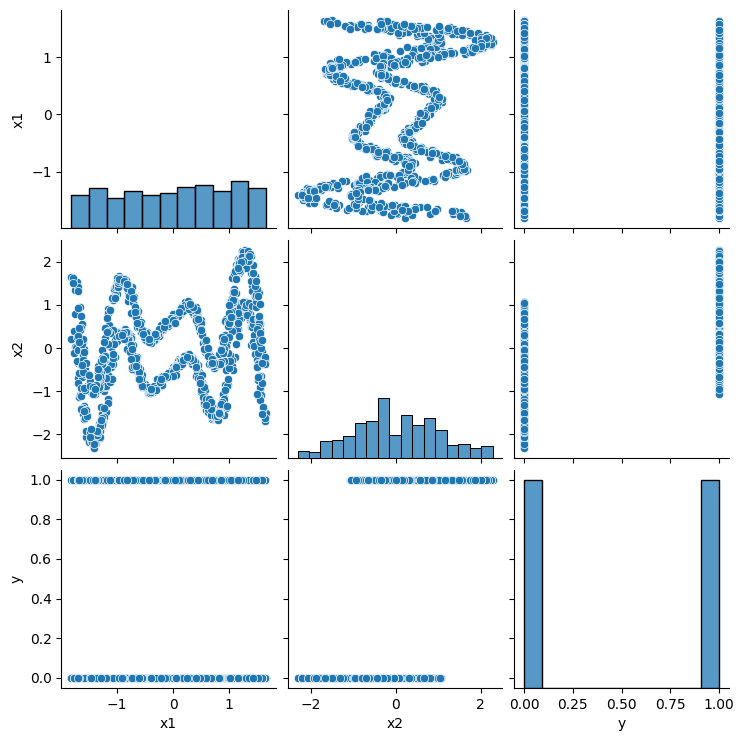

In [31]:
sns.pairplot(df)

- Some relation in x2

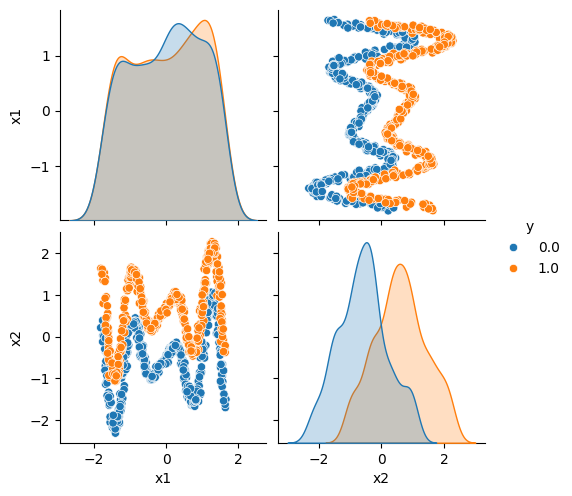

In [32]:
sns.pairplot(df, hue="y")

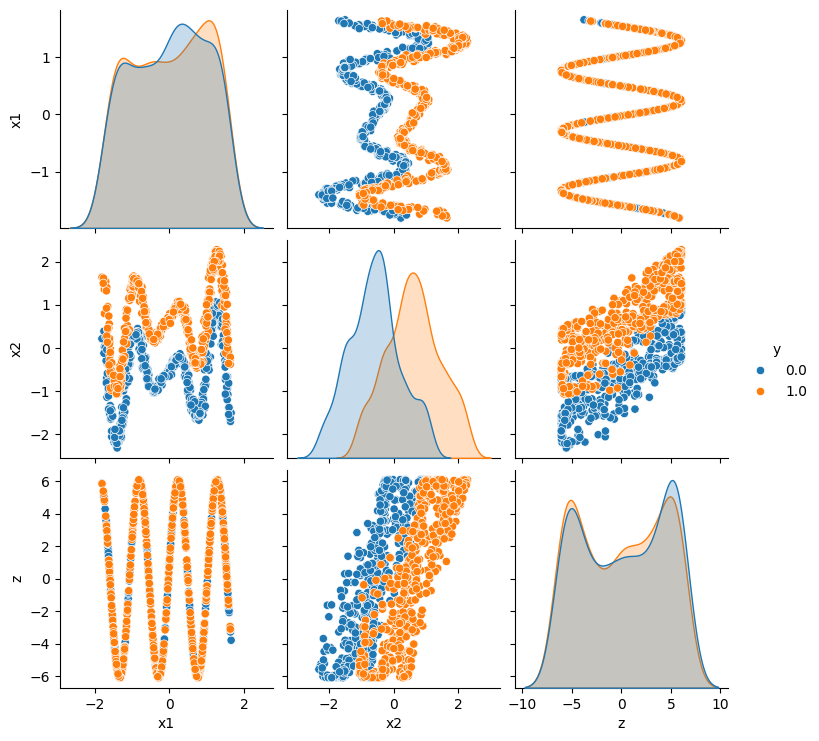

In [33]:
# Bad tries

# def sigmoid(x):
#   return 1 / (1 + np.exp(-x))
# df["z"] = sigmoid(sigmoid(df["x2"]))
# df["z"] = np.arctan(df["x2"])
# df["pos_x2"] = df["x2"] - df["x2"].min() + 1
# df["zz1"] = df["x2"].between(df[(df["y"] == 1)].x2.min(), df[(df["y"] == 1)].x2.max())
# df["zz2"] = df["x2"].between(df[(df["y"] == 0)].x2.min(), df[(df["y"] == 0)].x2.max())
# df["z"] = (df["x2"] - df["x2"].mean()) / df["x2"].std()
# df["z"] = np.sin(0.5*df["x1"]) + np.sin(6*df["x1"]) 

# sin, cos of 6x as it does 6 oscillations

df["z"] = 6*np.sin(6*df["x1"]) + np.cos(6*df["x1"])
sns.pairplot(df, hue="y")

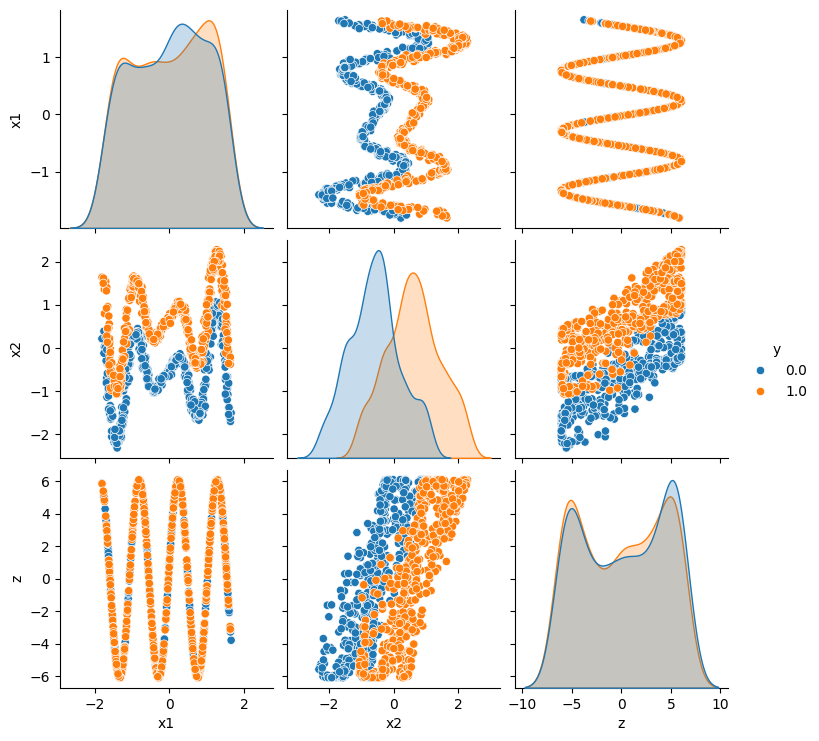

In [34]:
sns.pairplot(df, hue="y")

In [35]:
def transform_data(x, df_train, poly_degree=4):
    data = pd.DataFrame(x).copy()
    data.columns = ['x1', 'x2']
    data["x1"] = (data["x1"] - data["x1"].mean()) / data["x1"].std()
    data["x2"] = (data["x2"] - data["x2"].mean()) / data["x2"].std()
    data["z"] = 6*np.sin(6*data["x1"]) + np.cos(6*data["x1"])
    return data

df_train = pd.DataFrame(
    np.concat([x_train, y_train.reshape(-1,1)], axis=1), columns=["x1", "x2", "y"]
    )
for poly_degree in range(2, 10):
    print(poly_degree)
    linreg_skl = LinearSVC(loss="hinge", C=1, random_state=SEED, max_iter=100000)
    linreg_skl.fit(transform_data(x_train, df_train, poly_degree), y_train)
    train_pred = linreg_skl.predict(transform_data(x_train, df_train, poly_degree))
    print(f"TRAIN ACCURACY: {accuracy_score(y_train, train_pred)}")
    test_pred = linreg_skl.predict(transform_data(x_test, df_train, poly_degree))
    print("TEST ACCURACY: ", accuracy_score(y_test, test_pred))

2
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
3
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
4
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
5
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
6
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
7
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
8
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922
9
TRAIN ACCURACY: 0.93
TEST ACCURACY:  0.922


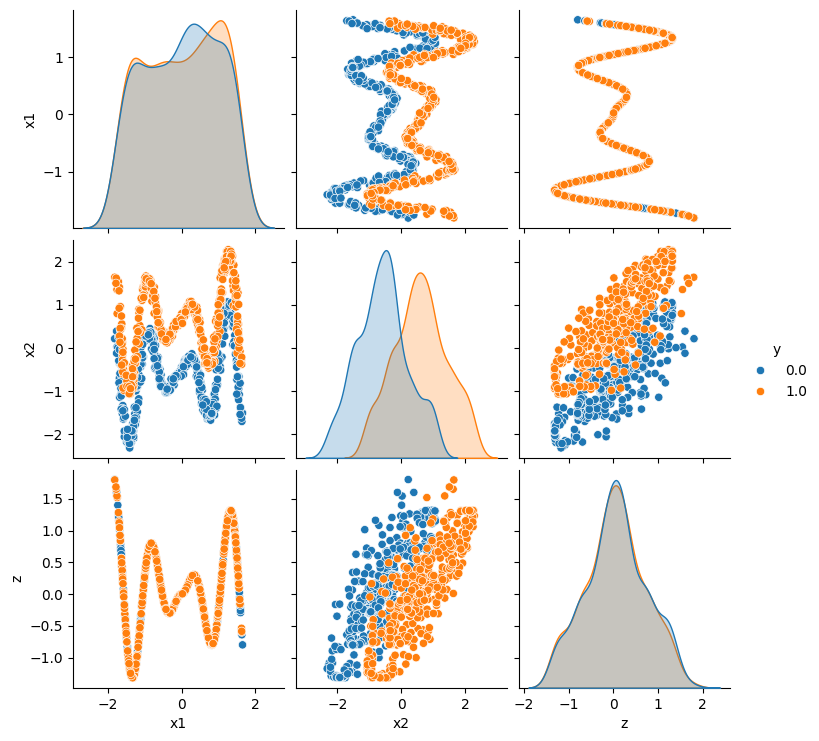

In [36]:
# For some reason I cant see the obvious functions :). Of course its sin(x)|x|
df["z"] = np.sin(6*df["x1"])*np.abs(df["x1"])#*np.arctan(12*df["x1"])+2
sns.pairplot(df, hue="y")

In [37]:
def transform_data(x, df_train, poly_degree=4):
    data = pd.DataFrame(x).copy()
    data.columns = ['x1', 'x2']
    data["x1"] = (data["x1"] - data["x1"].mean()) / data["x1"].std()
    data["x2"] = (data["x2"] - data["x2"].mean()) / data["x2"].std()
    data["z"] = np.sin(6*data["x1"])*np.abs(data["x1"])#6*np.sin(6*data["x1"]) + np.cos(6*data["x1"])
    return data

df_train = pd.DataFrame(
    np.concat([x_train, y_train.reshape(-1,1)], axis=1), columns=["x1", "x2", "y"]
    )
for poly_degree in range(2, 10):
    print(poly_degree)
    linreg_skl = LinearSVC(loss="hinge", C=1, random_state=SEED, max_iter=100000)
    linreg_skl.fit(transform_data(x_train, df_train, poly_degree), y_train)
    train_pred = linreg_skl.predict(transform_data(x_train, df_train, poly_degree))
    print(f"TRAIN ACCURACY: {accuracy_score(y_train, train_pred)}")
    test_pred = linreg_skl.predict(transform_data(x_test, df_train, poly_degree))
    print("TEST ACCURACY: ", accuracy_score(y_test, test_pred))

2
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
3
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
4
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
5
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
6
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
7
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
8
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958
9
TRAIN ACCURACY: 0.927
TEST ACCURACY:  0.958


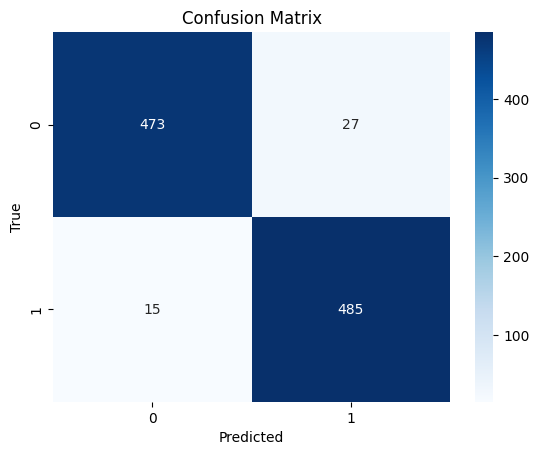

In [38]:
cf_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Task 3: Estimating Generalization Errors
(maximum achievable points: 30)  
In this task you will work with the “California Housing” data set [2].   
Split the data into a training set (30% of the data) and a test set (70% of the data) 
and keep this split fixed for the whole task. Normalize the data using the MinMaxScaler.  
You can use and adapt the code structure outlined in Tasks 1 for   
solving this exercise if you wish but it’s not mandatory.  


In [39]:
# loading data, splitting, scaling
data = fetch_california_housing(as_frame=True)
X, y = data.data.values, data.target.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=SEED, shuffle=True
)
mmx = MinMaxScaler()
X_train = mmx.fit_transform(X_train)
X_test =  mmx.transform(X_test)

## Subtask 1: Baseline
(4 points)
Fit a least squares linear regression model to the training data. 
- Compute the MSE on the training and test data and report it.
- Compute polynomial features of degree 2 of the data. Again, compute the MSE on the training and test data and report it.
- What do you observe?

In [40]:
# Fit a least squares linear regression model to the training data. 
# - Compute the MSE on the training and test data and report it.

linreg_skl = LinearRegression()
linreg_skl.fit(X_train, y_train)
y_pred = linreg_skl.predict(X_test)
print(f"MSE Train: {mean_squared_error(y_train, linreg_skl.predict(X_train))}")
print(f"MSE Test: {mean_squared_error(y_test, y_pred)}")

MSE Train: 0.5229818274185227
MSE Test: 0.5275236518754022


In [41]:
# Compute polynomial features of degree 2 of the data. 
# Again, compute the MSE on the training and test data and report it.

from sklearn.preprocessing import PolynomialFeatures
poly_transform = PolynomialFeatures(degree=2)
X_train_poly = poly_transform.fit_transform(X_train)
X_test_poly =  poly_transform.transform(X_test)

linreg_skl = LinearRegression()
linreg_skl.fit(X_train_poly, y_train)
y_pred = linreg_skl.predict(X_test_poly)
print(f"MSE Train: {mean_squared_error(y_train, linreg_skl.predict(X_train_poly))}")
print(f"MSE Test: {mean_squared_error(y_test, y_pred)}")

MSE Train: 0.39774084890170935
MSE Test: 20.795908454672904


- What do you observe?
1) MSE became smaller on train with polynomial features
2) Model overfitted on train data, as test mse is much highr than train mse

## Subtask 2: Implement Cross-validation
(13 points)
Implement Monte Carlo cross-validation and k-fold   
cross-validation for estimating the MSE of a least squares linear predictor.   
Do not use scikit-learn’s implementation for cross-validation but   
rather implement cross-validation on your own. Estimate the MSE of the linear predictor  
• using Monte Carlo cross-validation selecting 90 % of the data for training, and  
• using k-fold cross-validation with k = 10 on the training data.  
- What MSEs do you observe?
- How does this compare to the MSE on the test set from the previous subtask?
- Run Monte Carlo cross-validation for 20 times (each time sampling different training and test data).
 Report the variation in the results (e.g., by reporting the variance).
- Run k-fold cross-validation with k = 10 for 20 times (each time using a different permutation of the data on which the folds are based). 
Report the variation in the results (e.g., by reporting the variance).
- Repeat the previous experiment but this time for k = 20. Do you observe any differences?

In [42]:
# Implement Monte Carlo cross-validation and k-fold   
# cross-validation for estimating the MSE of a least squares linear predictor.  
def monte_carlo_cross_validation(model, X, y, k, random_state=None):
    mse_scores = []
    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=random_state
            )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    return mse_scores

def k_fold_cross_validation(model, X, y, k, shuffle=False):
    mse_scores = []
    if shuffle:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
    folds_indices = np.array_split(np.arange(len(X)), k)
    for i in range(k):
        X_train = X[np.concat([folds_indices[j] for j in range(len(folds_indices)) if i!=j])]
        X_test = X[folds_indices[i]]
        y_train = y[np.concat([folds_indices[j] for j in range(len(folds_indices)) if i!=j])]
        y_test = y[folds_indices[i]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    return mse_scores

In [43]:
# Estimate the MSE of the linear predictor  
# - What MSEs do you observe?
k = 10
linreg_skl = LinearRegression()
mc_cv_results = monte_carlo_cross_validation(linreg_skl, X_train, y_train, k, random_state=SEED)
print(f"The MSE of the linear predictor is {np.mean(mc_cv_results)}")

k = 10
linreg_skl = LinearRegression()
kf_cv_results = k_fold_cross_validation(linreg_skl, X_train, y_train, k)
print(f"The MSE of the linear predictor is {np.mean(kf_cv_results)}")

The MSE of the linear predictor is 0.551439097940494
The MSE of the linear predictor is 2.8648750320893126


- How does this compare to the MSE on the test set from the previous subtask?

1) Monte Carlo Estimation is the same as the one above
2) K-fold one differs largely

In [44]:
# Run Monte Carlo cross-validation for 20 times 
# (each time sampling different training and test data).
# Report the variation in the results (e.g., by reporting the variance).

scores = []
for i in range(20):
    k = 10
    linreg_skl = LinearRegression()
    mc_cv_results = monte_carlo_cross_validation(linreg_skl, X_train, y_train, k)
    scores.append(np.mean(mc_cv_results))
print(f"Monte-Carlo cross-validation mean {np.mean(scores)}, variance: {np.var(scores)}")

# Run k-fold cross-validation with k = 10 for 20 times 
# (each time using a different permutation of the data on which the folds are based). 
# Report the variation in the results (e.g., by reporting the variance).

scores = []
for i in range(20):
    k = 10
    linreg_skl = LinearRegression()
    mc_cv_results = k_fold_cross_validation(linreg_skl, X_train, y_train, k, shuffle=True)
    scores.append(np.mean(mc_cv_results))
print(f"K-Fold cross-validation mean {np.mean(scores)}, variance: {np.var(scores)}")

Monte-Carlo cross-validation mean 4.197306260970088, variance: 8.922498045005938


K-Fold cross-validation mean 2.915584763097959, variance: 0.03231417221544148


In [45]:
# Repeat the previous experiment but this time for k = 20. Do you observe any differences?

scores = []
for i in range(20):
    k = 20
    linreg_skl = LinearRegression()
    mc_cv_results = monte_carlo_cross_validation(linreg_skl, X_train, y_train, k)
    scores.append(np.mean(mc_cv_results))
print(f"Monte-Carlo cross-validation mean {np.mean(scores)}, variance: {np.var(scores)}")

scores = []
for i in range(20):
    k = 20
    linreg_skl = LinearRegression()
    mc_cv_results = k_fold_cross_validation(linreg_skl, X_train, y_train, k, shuffle=True)
    scores.append(np.mean(mc_cv_results))
print(f"K-Fold cross-validation mean {np.mean(scores)}, variance: {np.var(scores)}")

Monte-Carlo cross-validation mean 2.463893202499919, variance: 1.9498988716252945
K-Fold cross-validation mean 2.9550230207866943, variance: 0.009623415202426985


- Do you observe any differences?
1) Varience became smaller
2) Varience of K-Fold is smaller in both cases
3) 

## Subtask 3: Model Selection
(13 points)
Train least squares linear regression models for different degrees of   
polynomial features p ∈ {1, 2, 3, 4, 5} of the data and use the following   
four methods to choose the optimal degree wrt prediction performance:  
(1) Select the best degree with respect to the MSE on the training data.  
(2) Split the training data into new training data (50% of the data, chosen randomly)   
and validation data (the remaining 50% of the data). Train linear regression models    
on the new (smaller) training set and pick the best degree with respect to the MSE on the validation data.  
(3) Use 10-fold cross-validation for estimating the MSE of least squares   
  linear regression models for different degrees of polynomial features.  
(4) Use 20-fold cross-validation for estimating the MSE of least squares   
linear regression models for different degrees of polynomial features.  
- Evaluate the linear regression model with the found degrees on the test data and report your results.
- Do the approaches yield consistent results regarding the “optimal” degree?
- If they differ, why do they differ? Which method would you recommend to use?

In [46]:
degrees = [1, 2, 3, 4, 5]
optimal_degrees = []

In [47]:
# 1
# Select the best degree with respect to the MSE on the training data.
train_mse = []
for p in degrees:
    print(f"Degree: {p}")
    poly_transform = PolynomialFeatures(degree=p)
    X_train_poly = poly_transform.fit_transform(X_train)

    linreg_skl = LinearRegression()
    linreg_skl.fit(X_train_poly, y_train)
    train_mse.append(mean_squared_error(y_train, linreg_skl.predict(X_train_poly)))
    print(f"MSE Train: {train_mse[-1]}\n")
optimal_degrees.append(degrees[np.argmin(train_mse)])
print(f"Best degree: {optimal_degrees[-1]}")

Degree: 1
MSE Train: 0.5229818274185227

Degree: 2
MSE Train: 0.39774084890170935

Degree: 3
MSE Train: 0.3280566717687909

Degree: 4
MSE Train: 0.25584502427014505

Degree: 5
MSE Train: 0.18783509923794894

Best degree: 5


In [48]:
# 2
# Split the training data into new training data 
# (50% of the data, chosen randomly) and validation data (the remaining 50% of the data). 
# Train linear regression models on the new (smaller) training set and 
# pick the best degree with respect to the MSE on the validation data.
val_mse = []
for p in degrees:
    print(f"Degree: {p}")
    poly_transform = PolynomialFeatures(degree=p)
    X_train_32, X_val_32, y_train_32, y_val_32 = train_test_split(X_train, y_train, test_size=0.5)
    X_train_poly = poly_transform.fit_transform(X_train_32)
    X_val_poly =  poly_transform.transform(X_val_32)

    linreg_skl = LinearRegression()
    linreg_skl.fit(X_train_poly, y_train_32)
    val_mse.append(mean_squared_error(y_val_32, linreg_skl.predict(X_val_poly)))
    print(f"MSE Train: {mean_squared_error(y_train_32, linreg_skl.predict(X_train_poly))}")
    print(f"MSE Val: {val_mse[-1]}\n")

optimal_degrees.append(degrees[np.argmin(val_mse)])
print(f"Best degree: {optimal_degrees[-1]}")

Degree: 1
MSE Train: 0.4667713601239504
MSE Val: 3.1271415824185054

Degree: 2
MSE Train: 0.39554144036144984
MSE Val: 0.4475203729626201

Degree: 3
MSE Train: 0.30378794331903636
MSE Val: 2.266941776935947

Degree: 4
MSE Train: 0.22843079032654257
MSE Val: 68692975356863.62

Degree: 5
MSE Train: 0.1266764483366709
MSE Val: 23024371258.91192

Best degree: 2


In [49]:
# (3) Use 10-fold cross-validation for estimating the MSE of least squares   
#   linear regression models for different degrees of polynomial features.  
k = 10
cv_mse = []
for p in degrees:
    print(f"Degree: {p}")
    poly_transform = PolynomialFeatures(degree=p)
    X_train_poly = poly_transform.fit_transform(X_train)

    linreg_skl = LinearRegression()

    mc_cv_results = k_fold_cross_validation(linreg_skl, X_train_poly, y_train, k, shuffle=False)
    cv_mse.append(np.mean(mc_cv_results))
    print(f"MSE Train: {cv_mse[-1]}\n")
optimal_degrees.append(degrees[np.argmin(cv_mse)])
print(f"Best degree: {optimal_degrees[-1]}")

Degree: 1
MSE Train: 2.8648750320893357

Degree: 2
MSE Train: 7420.402018268376

Degree: 3
MSE Train: 136253418.8830249

Degree: 4
MSE Train: 377045749241.4295

Degree: 5
MSE Train: 3.659064356392024e+16

Best degree: 1


In [50]:
# (4) Use 20-fold cross-validation for estimating the MSE of least squares   
# linear regression models for different degrees of polynomial features.  
k = 20
cv_mse = []
for p in degrees:
    print(f"Degree: {p}")
    poly_transform = PolynomialFeatures(degree=p)
    X_train_poly = poly_transform.fit_transform(X_train)

    linreg_skl = LinearRegression()

    mc_cv_results = k_fold_cross_validation(linreg_skl, X_train_poly, y_train, k, shuffle=False)
    cv_mse.append(np.mean(mc_cv_results))
    print(f"MSE Train: {cv_mse[-1]}\n")
optimal_degrees.append(degrees[np.argmin(cv_mse)])
print(f"Best degree: {optimal_degrees[-1]}")

Degree: 1
MSE Train: 2.9137646635321817

Degree: 2
MSE Train: 7087.492821886399

Degree: 3
MSE Train: 125467042.52827461

Degree: 4
MSE Train: 342835737467.9281

Degree: 5
MSE Train: 1.0273425238425861e+17

Best degree: 1


In [51]:
# - Evaluate the linear regression model with the found degrees on the test data and report your results.
test_mse = []
for p in degrees:
    print(f"Degree: {p}")
    poly_transform = PolynomialFeatures(degree=p)
    X_train_poly = poly_transform.fit_transform(X_train)
    X_test_poly =  poly_transform.transform(X_test)

    linreg_skl = LinearRegression()
    linreg_skl.fit(X_train_poly, y_train)
    test_mse.append(mean_squared_error(y_test, linreg_skl.predict(X_test_poly)))
    print(f"MSE Test: {test_mse[-1]}\n")

print(f"Best degree: {degrees[np.argmin(cv_mse)]}")
print(f"Descicion methods listed above yiold the following results: {optimal_degrees}")

Degree: 1
MSE Test: 0.5275236518754022

Degree: 2
MSE Test: 20.795908454672904

Degree: 3
MSE Test: 442244.95784040756

Degree: 4
MSE Test: 451955403288.2791

Degree: 5
MSE Test: 2.6627038851622003e+17

Best degree: 1
Descicion methods listed above yiold the following results: [5, 2, 1, 1]


- Do the approaches yield consistent results regarding the “optimal” degree?
- If they differ, why do they differ? Which method would you recommend to use?
1) Methods 3, 4 got the best results on the test set, they chose optimal degree, if looking at the MSE on the test set.
2) Method 1 has different degree. It clearly overfitted to the training set, as mse on training was chosen as metric. This will happen on any data, so I would not recommend this method.
3) I would recommend methods 3 and 4, as they utilize whole training set, unlike 2, which doesnt use half of the training set.
4) The choice between 3 and 4 depends on the amount of data. If there is a lot of data, 3 is better, as it will use less computer resources, as well as work faster. If this is not a problem, 4 is the best one.